<a class="anchor" id="TOP"></a>
***
# **<font color='#3182bd'>Sales Performance & Revenue Analysis: KPI Trends, Product Insights, and Regional Performance (2022–2024)</font>**

## **S. Taylor**
***
## **<font color='#3182bd'>Project Introduction</font>**

This project analyzes a synthetic sales performance dataset to evaluate business trends, operational efficiency, and revenue drivers for a retail company over a three-year period (2022–2024). The dataset captures detailed transaction-level information across orders, customers, products, pricing, discounts, revenue, and profit, providing a realistic foundation for end-to-end sales analysis.

The analysis focuses on transforming raw transactional data into actionable business insights by applying practical data preparation techniques, structured aggregation, and key performance indicator (KPI) evaluation. Throughout the project, common real-world data challenges—such as missing values, inconsistent records, and loss-making transactions—are handled deliberately to preserve data integrity and analytical accuracy.

**Key areas of analysis include:**
- Cleaning and preparing raw sales data while retaining realistic imperfections
- Evaluating revenue and profit trends over time to identify growth patterns and volatility
- Identifying top-performing products and categories by revenue, profit, and sales volume
- Assessing regional sales performance to highlight high- and low-performing markets
- Analyzing customer purchasing behavior, including order frequency and average order value (AOV)

Together, these insights demonstrate a complete analytical workflow using SQL and Python and provide a data-driven foundation for business decisions related to pricing strategy, inventory planning, and regional sales optimization.

***
## **<font color='#3182bd'>Project Objectives</font>**

The objective of this project is to systematically explore and understand the sales performance data to support actionable business insights. The analysis is organized into six main stages:

1. [**Data Overview**](#sec_1)  
   - Examine the `sales` dataset to understand the structure, variables, and context.  
   - Identify key metrics for sales performance, including revenue, profit, quantity, discounts, and order details.  
<br><br>
2. [**Data Cleansing & Preparation**](#sec_2)  
   - Handle missing values and inconsistencies in `sales_clean` to ensure accuracy.  
   - Apply logical imputation and formula-based calculations for unit price, discount, revenue, and profit.  
   - Maintain a clean, working copy of the dataset without altering the raw data.  
<br><br>
3. [**Summary Statistics & Initial Validation**](#sec_3)  
   - Generate aggregate and descriptive statistics for revenue, profit, and order quantities.  
   - Identify potential outliers or data quality issues.  
   - Validate that cleaned data aligns with expected business logic.  
<br><br>
4. [**Sales Trends & KPIs**](#sec_4)  
   - Analyze temporal trends in monthly revenue, profit, and growth.  
   - Calculate key performance indicators such as average order value (AOV) and month-over-month revenue change.  
   - Highlight periods of acceleration or decline in sales performance.  
<br><br>
5. [**Product & Category Performance Analysis**](#sec_5)  
   - Rank products and categories by revenue, profit, and units sold.  
   - Identify top-performing products for inventory and marketing decisions.  
   - Assess average order value per product and category for strategic insights.  
<br><br>
6. [**Regional & Customer Insights**](#sec_6)  
   - Examine sales performance by geographic region and customer behavior.  
   - Highlight high-performing regions and customer segments.  
   - Analyze customer order frequency to identify engagement patterns.

***
## **<font color='#3182bd'>Setup</font>**

**Data Source:**  
- A synthetic sales performance dataset stored as a CSV file, containing simulated retail transactions from 2022–2024.  
- The dataset includes order details, customer identifiers, regional information, product categories, pricing, discounts, revenue, and profit.  
- Realistic data imperfections (e.g., missing values and occasional negative profits) are intentionally included to reflect real-world sales data.

**Tools & Libraries:**  
- **Python:** `pandas`, `numpy`, `matplotlib`  
- **SQL:** SQLite3 with `%sql` magic in Jupyter Notebook (`ipython-sql`)  
- **Jupyter Notebook** for interactive analysis and visualization  
- **Additional utilities:** `csv` for data handling

**Setup & Installation:**  
- Required Python libraries are installed and imported at the start of the notebook.  
- The CSV file is loaded into a Pandas DataFrame and written to a local SQLite database (`SalesPerform.db`).  
- A SQLite connection is established to enable SQL-based data transformations and aggregations alongside Python analysis.

In [2]:
%%capture
!pip install pandas
import csv, sqlite3, pandas as pd, matplotlib.pyplot as plt, numpy as np, seaborn as sns

con = sqlite3.connect("SalesPerform.db")
cur = con.cursor()

%load_ext sql
%sql sqlite:///SalesPerform.db

<a class="anchor" id="sec_1"></a>
***
## **<font color='#3182bd'>Data Overview</font>**

### `sales` table | Synthetic Sales Performance Dataset

The `sales` table contains simulated transactional data representing retail sales activity over a three-year period (2022–2024). Each row corresponds to an individual line item within an order, allowing for detailed analysis at both the transaction and aggregated order levels.

The dataset is designed to closely resemble real-world sales data, incorporating common characteristics such as varying order sizes, category-specific pricing, discounts, regional variation, and occasional data quality issues (e.g., missing values and negative profits). This structure supports realistic analysis of revenue, profitability, and customer behavior.

**Key characteristics of the dataset:**
- Transaction-level granularity with the ability to aggregate to orders, products, categories, customers, and regions  
- Time-based fields enabling trend and seasonality analysis  
- Financial metrics (revenue and profit) suitable for KPI and performance evaluation  
- Intentional imperfections to support practical data cleaning and validation workflows  

| Column Name | Description |
|------------:|------------|
| `order_id` | Unique identifier for each sales order. |
| `order_date` | Date when the order was placed. |
| `ship_date` | Date when the order was shipped. |
| `customer_id` | Unique identifier for the customer. |
| `region` | Geographic region of the customer (East, West, Central, South). |
| `product_category` | High-level product category (Technology, Furniture, Office Supplies). |
| `product_name` | Specific product sold (e.g., Laptop, Desk, Printer, Paper). |
| `quantity` | Number of units sold in the transaction. |
| `unit_price` | Price per unit of the product in USD. |
| `discount` | Discount applied to the order (range: 0–0.30). |
| `revenue` | Revenue generated from the transaction: `quantity × unit_price × (1 − discount)`. |
| `profit` | Profit from the transaction, which may be negative for loss-making orders. |

This data structure enables flexible analysis across multiple business dimensions and provides a strong foundation for evaluating sales performance, profitability, and customer purchasing patterns.

In [3]:
%%capture
sales_df = pd.read_csv('sales_data.csv')

sales_df.to_sql(
    "sales",
    con,
    if_exists="replace",
    index=False,
    chunksize=500  # 500 rows per insert avoids SQLite limits
)

### Dataset Snapshot

In [4]:
%%sql
SELECT * FROM sales
ORDER BY order_id
LIMIT 7;

 * sqlite:///SalesPerform.db
Done.


order_id,order_date,ship_date,customer_id,region,product_category,product_name,quantity,unit_price,discount,revenue,profit
1,2024-08-05,2024-08-09,381,South,Furniture,Desk,4,425.0,0.0,1700.0,430.78
1,2024-08-05,2024-08-06,381,East,Furniture,Couch,7,950.0,0.0,6650.0,1361.97
2,2023-04-05,2023-04-10,1031,East,Furniture,Bookshelf,6,220.0,0.0,1320.0,458.37
2,2023-04-05,2023-04-11,1031,South,Furniture,Cabinet,7,300.0,0.19,1701.0,297.07
3,2022-01-29,2022-02-04,907,East,Furniture,Desk,5,425.0,0.18,1742.5,579.01
3,2022-01-29,2022-02-04,907,West,Office Supplies,Pen,12,3.0,None,36.0,6.52
4,2024-11-22,2024-11-28,1670,West,Technology,Mouse,5,49.0,0.18,200.9,46.39


We generate a high-level summary using SQL to quickly understand the dataset’s scope and structure:

**Key Observations:**

- **Unique orders:** 1356
- **Unique customers:** 971
- **Regions:** 4 (East, West, Central, South)
- **Product categories:** 3 (Technology, Furniture, Office Supplies)
- **Unique products:** 17
- **Average quantity per order line:** 7.31 units
- **Average discount applied:** 6%

In [5]:
%%sql
SELECT
    COUNT(DISTINCT order_id) as order_count,
    COUNT(DISTINCT customer_id) as customer_count,
    COUNT(DISTINCT region) as region_count,
    COUNT(DISTINCT product_category) as category_count,
    COUNT(DISTINCT product_name) as product_count,
    ROUND(AVG(quantity),2) as avg_quanity,
    ROUND(AVG(discount),2) as avg_discount
FROM sales
;

 * sqlite:///SalesPerform.db
Done.


order_count,customer_count,region_count,category_count,product_count,avg_quanity,avg_discount
1356,971,4,3,17,7.31,0.06


<a class="anchor" id="sec_2"></a>
***
## **<font color='#3182bd'>Data Cleansing & Preparation</font>**

The goal of the data cleansing process is to produce a reliable and analytically consistent sales dataset while preserving realistic characteristics commonly found in transactional business data. Rather than aggressively removing or overwriting imperfect records, this approach emphasizes logical imputation, formula-based corrections, and transparency around remaining data gaps.

**Key fixes applied:**
- **Missing unit prices:** Filled with the average unit price per product to maintain realistic pricing patterns.  
- **Missing discounts:** Calculated from `revenue / (quantity × unit_price)` where possible; otherwise defaulted to 0.  
- **Missing revenue:** Recalculated using the standard formula `quantity × unit_price × (1 − discount)` to ensure consistency.  
- **Missing profit:** Imputed using product-level median profit margins, preserving category-specific profitability patterns.  
- **Ship dates:** Left as NA when missing, reflecting occasional operational reporting gaps.

### Initial Assessment of Missing Values

A column-level review of the raw data shows that most fields are complete, with missing values concentrated in financial and operational columns such as `unit_price`, `discount`, `revenue`, `profit`, and `ship_date`. These gaps reflect realistic data quality issues, such as incomplete pricing information, unrecorded discounts, or delayed shipment records, and guide the cleansing strategy applied in subsequent steps.


In [6]:
sales_df.isna().sum()

order_id              0
order_date            0
ship_date            47
customer_id           0
region                0
product_category      0
product_name          0
quantity              0
unit_price            9
discount            137
revenue               7
profit                3
dtype: int64

### Creation of a Clean Working Table

To preserve the integrity of the original dataset, a separate table (`sales_clean`) is created as a working copy of the raw `sales` table.

**Rationale:**
- Keeps the raw dataset intact for reference and validation
- Allows all cleansing steps to be applied without modifying source data
- Provides a stable foundation for downstream analysis and aggregation

During this step, numeric financial fields are also rounded to two decimal places to ensure consistency in monetary calculations.

In [7]:
%%capture
%%sql
DROP TABLE IF EXISTS sales_clean;

CREATE TABLE sales_clean AS
SELECT
    order_id,
    order_date,
    ship_date,
    customer_id,
    region,
    product_category,
    product_name,
    quantity,
    ROUND(unit_price,2) as unit_price,
    ROUND(discount,2) as discount,
    ROUND(revenue,2) as revenue,
    ROUND(profit,2) as profit
FROM sales;

### Fill Missing `unit_price` by Product Average

Missing unit prices are replaced with the average unit price for the corresponding product. This ensures that pricing is consistent at the product level and preserves realistic revenue and profit calculations.

**Justification:**
- Keeps revenue and profit calculations accurate
- More precise than filling by category or global dataset mean

In [8]:
%%capture
%%sql

-- Step 2: Fill missing unit_price by product_name average
WITH product_avg AS (
    SELECT 
        product_name,
        AVG(unit_price) AS avg_unit_price
    FROM sales_clean
    WHERE unit_price IS NOT NULL
    GROUP BY product_name
)
UPDATE sales_clean
SET unit_price = (
    SELECT avg_unit_price
    FROM product_avg AS p
    WHERE p.product_name = sales_clean.product_name
)
WHERE unit_price IS NULL;

In [9]:
%%sql
SELECT
    COUNT(*) - COUNT(unit_price) AS NaN_count
FROM
    sales_clean;

 * sqlite:///SalesPerform.db
Done.


NaN_count
0


### Fill Missing `discount` Values

Discounts are calculated using the formula `discount = 1 - revenue / (quantity × unit_price)` for rows where revenue is known. Any remaining missing discounts are set to 0, assuming no discount was applied.

**Justification:**
- Maintains internal consistency between revenue, quantity, and unit price  
- Provides exact values where possible, avoiding arbitrary defaults  

In [10]:
%%capture
%%sql
UPDATE sales_clean
SET discount = ROUND(1 - revenue / (quantity * unit_price), 2)
WHERE discount IS NULL AND revenue IS NOT NULL;

In [11]:
%%capture
%%sql
UPDATE sales_clean
SET discount = 0
WHERE discount IS NULL;

In [12]:
%%sql
SELECT
    COUNT(*) - COUNT(discount) AS NaN_count
FROM
    sales_clean;

 * sqlite:///SalesPerform.db
Done.


NaN_count
0


### Recalculate Missing `revenue`

Revenue is recalculated for any missing values using the formula `quantity * unit_price * (1 - discount)`.

**Justification:**
- Revenue can always be derived from other columns  
- Ensures consistency across all financial calculations  

In [13]:
%%capture
%%sql
UPDATE sales_clean
SET revenue = quantity * unit_price * (1 - discount)
WHERE revenue IS NULL;

In [14]:
%%sql
SELECT
    COUNT(*) - COUNT(revenue) AS NaN_count
FROM
    sales_clean;

 * sqlite:///SalesPerform.db
Done.


NaN_count
0


### Fill Missing `profit` by Product-Level Median

Missing profit values are imputed using product-level median profit margins, calculated as `profit / revenue`. This approach keeps profitability realistic and proportional to revenue while avoiding distortion from outliers.

**Justification:**
- Profit naturally depends on product type  
- Maintains category-specific patterns and analytical realism  

In [15]:
%%capture
%%sql

-- Fill missing profit using product-level average profit margin
WITH product_margin AS (
    SELECT
        product_name,
        AVG(profit * 1.0 / revenue) AS avg_margin
    FROM sales_clean
    WHERE profit IS NOT NULL AND revenue IS NOT NULL
    GROUP BY product_name
)
UPDATE sales_clean
SET profit = ROUND(revenue * avg_margin, 2)
FROM product_margin AS pm
WHERE sales_clean.product_name = pm.product_name
  AND sales_clean.profit IS NULL
  AND sales_clean.revenue IS NOT NULL;

In [16]:
%%sql
SELECT
    COUNT(*) - COUNT(profit) AS NaN_count
FROM
    sales_clean;

 * sqlite:///SalesPerform.db
Done.


NaN_count
3


### Post-Cleansing Validation & Remaining Missing Values

After all cleansing steps, the cleaned dataset is reassessed for missing values. All intended imputations are applied for `unit_price`, `discount`, `quantity`, and `revenue`.

**Remaining missing values:**
- `profit`: 3 rows (~0.1%)  
- `ship_date`: 47 rows (~1.6%)  

**Rationale for retention:**
- Missing profit is minimal and unlikely to affect aggregate analyses  
- Missing ship dates reflect realistic operational gaps  

This approach ensures transparency about data quality while preserving a robust and analytically sound dataset for subsequent sales performance analysis.

In [17]:
sales_clean_df = pd.read_sql("SELECT * FROM sales_clean", con)
sales_clean_df.isna().sum()

order_id             0
order_date           0
ship_date           47
customer_id          0
region               0
product_category     0
product_name         0
quantity             0
unit_price           0
discount             0
revenue              0
profit               3
dtype: int64

<a class="anchor" id="sec_3"></a>
***
## **<font color='#3182bd'>Summary Statistics & Initial Validation</font>**

Before exploring trends and KPIs, it is important to validate and summarize the cleaned dataset. This section provides high-level descriptive statistics at the order level to understand the distribution of revenue, profit, and transaction sizes.

**Key metrics:**
- Revenue per order: minimum, maximum, average, median  
- Profit per order: minimum, maximum, average, median  
- Average Order Value (AOV) across all orders  

### Initial Assessment of Revenue & Profit per Order

This analysis aggregates revenue and profit per order to understand typical transaction sizes and potential outliers.

**Insights:**  
- Revenue per order ranges from **\$1.87** to **\$32,020.0**, with an average of **\$2,506.37** and a median of **\$1,275**, indicating a mix of small and large transactions.  
- Profit per order varies from a loss of **\$3,454.66** to a gain of **\$7,178.36**, showing occasional loss-making orders.  
- These metrics provide context for subsequent analyses and highlight that extreme transactions may influence average KPIs.


In [18]:
%%sql

-- Aggregate revenue, profit, and quantity per order
WITH order_agg AS (
    SELECT
        order_id,
        MIN(order_date) AS order_date,          -- order_date per order
        MIN(customer_id) AS customer_id,        -- customer_id per order
        SUM(revenue) AS total_revenue,
        SUM(profit) AS total_profit,
        SUM(quantity) AS total_quantity
    FROM sales_clean
    GROUP BY order_id
)

-- Compute summary statistics
SELECT
    MIN(total_revenue) AS min_revenue,
    MAX(total_revenue) AS max_revenue,
    ROUND(AVG(total_revenue),2) AS avg_revenue,
    ROUND((SELECT total_revenue
           FROM order_agg
           ORDER BY total_revenue
           LIMIT 1 OFFSET (SELECT COUNT(*)/2 FROM order_agg)),2) AS median_revenue,
    MIN(total_profit) AS min_profit,
    MAX(total_profit) AS max_profit,
    ROUND(AVG(total_profit),2) AS avg_profit,
    ROUND((SELECT total_profit
           FROM order_agg
           ORDER BY total_profit
           LIMIT 1 OFFSET (SELECT COUNT(*)/2 FROM order_agg)),2) AS median_profit
FROM order_agg;

 * sqlite:///SalesPerform.db
Done.


min_revenue,max_revenue,avg_revenue,median_revenue,min_profit,max_profit,avg_profit,median_profit
1.87,32020.0,2506.37,1275.0,-3454.66,7178.36,572.19,273.37


### Average Order Value (AOV)

The overall AOV measures the typical transaction size across all orders.

**Insight:**  
- The AOV is **\$2,506.10**, providing a benchmark for typical sales transactions in this dataset.

In [19]:
%%sql
-- Average Order Value per order
SELECT 
    ROUND(AVG(order_total), 2) AS avg_order_value
FROM (
    SELECT 
        order_id,
        SUM(quantity * unit_price * (1 - discount)) AS order_total
    FROM sales_clean
    GROUP BY order_id
) AS orders;

 * sqlite:///SalesPerform.db
Done.


avg_order_value
2506.1


<a class="anchor" id="sec_4"></a>
## **<font color='#3182bd'>Exploratory Data Analysis (EDA) & KPI Trends</font>**

This section examines revenue and profit trends over time, including month-over-month growth. These analyses help identify seasonality, periods of high or low sales, and overall performance trends.

### Monthly Revenue & Profit Trends

**Insights:**  
- Revenue and profit generally increase over time, but some months show significant dips or spikes, reflecting potential seasonality or sales campaigns.  
- The overlapped plot shows that while profit generally tracks revenue, it occasionally lags or leads slightly, highlighting variations in margin performance.  
- Month-over-month growth calculations (from `revenue_mom_growth_pct`) help identify months of rapid growth or decline for further investigation.


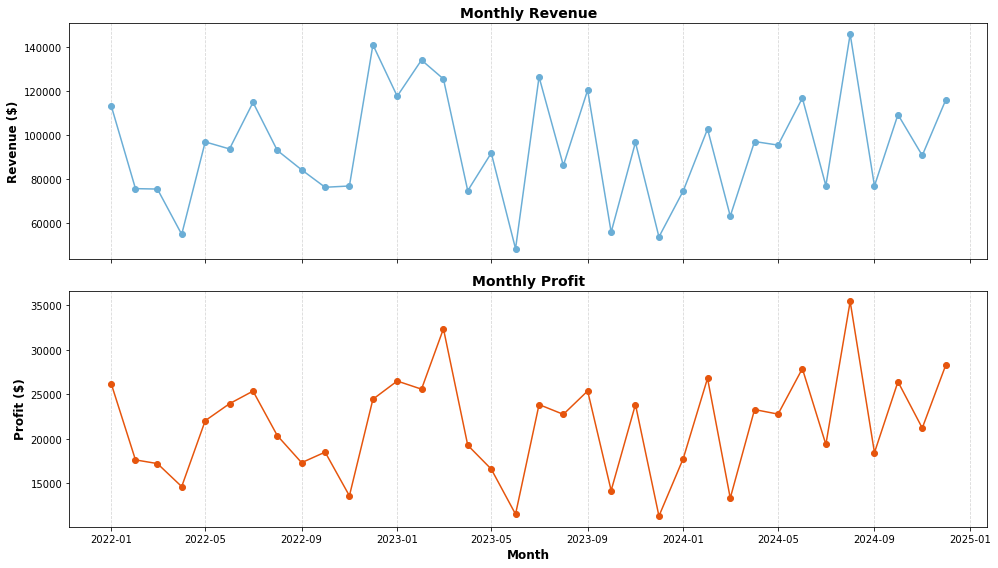

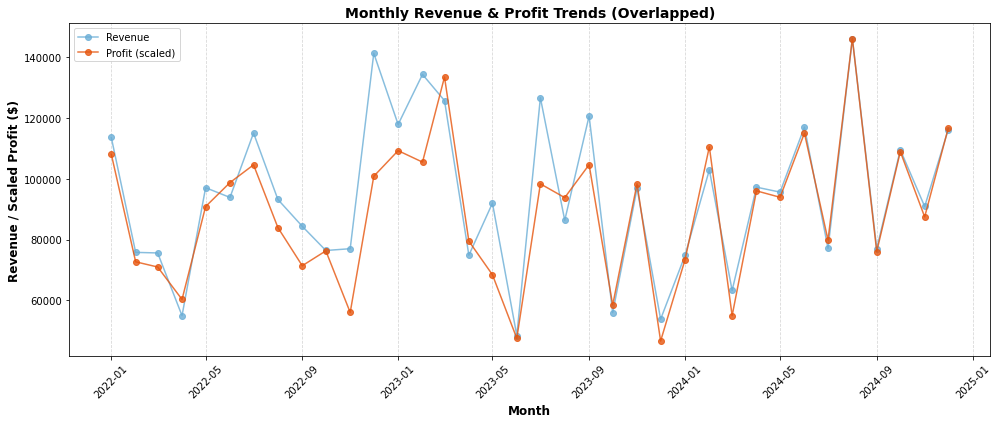

In [20]:
# Monthly aggregation
monthly_df = pd.read_sql("""
WITH monthly_agg AS (
    SELECT
        strftime('%Y-%m', order_date) AS order_month,
        ROUND(SUM(revenue),2) AS total_revenue,
        ROUND(SUM(profit),2) AS total_profit
    FROM sales_clean
    GROUP BY order_month
)
SELECT
    order_month,
    total_revenue,
    total_profit,
    LAG(total_revenue) OVER (ORDER BY order_month) AS prev_month_revenue,
    ROUND((total_revenue - LAG(total_revenue) OVER (ORDER BY order_month)) * 100.0 / 
          LAG(total_revenue) OVER (ORDER BY order_month), 2) AS revenue_mom_growth_pct
FROM monthly_agg
ORDER BY order_month;
""", con)

# Convert month to datetime
monthly_df['order_month'] = pd.to_datetime(monthly_df['order_month'])

# Fill in missing months
all_months = pd.date_range(monthly_df['order_month'].min(),
                           monthly_df['order_month'].max(), freq='MS')
monthly_df = monthly_df.set_index('order_month').reindex(all_months).fillna(0).rename_axis('order_month').reset_index()

# Separate subplots
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(14,8), sharex=True)
ax1.plot(monthly_df['order_month'], monthly_df['total_revenue'], marker='o', color='#6baed6')
ax1.set_title('Monthly Revenue', fontweight='bold', fontsize=14)
ax1.set_ylabel('Revenue ($)', fontweight='bold', fontsize=12)
ax1.grid(axis='x', linestyle='--', alpha=0.5)

ax2.plot(monthly_df['order_month'], monthly_df['total_profit'], marker='o', color='#e6550d')
ax2.set_title('Monthly Profit', fontweight='bold', fontsize=14)
ax2.set_xlabel('Month', fontweight='bold', fontsize=12)
ax2.set_ylabel('Profit ($)', fontweight='bold', fontsize=12)
ax2.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# Overlapped plot
profit_scaled = monthly_df['total_profit'] / monthly_df['total_profit'].max() * monthly_df['total_revenue'].max()
plt.figure(figsize=(14,6))
plt.plot(monthly_df['order_month'], monthly_df['total_revenue'], marker='o', color='#6baed6', alpha=0.8, label='Revenue')
plt.plot(monthly_df['order_month'], profit_scaled, marker='o', color='#e6550d', alpha=0.8, label='Profit (scaled)')
plt.title('Monthly Revenue & Profit Trends (Overlapped)', fontweight='bold', fontsize=14)
plt.xlabel('Month', fontweight='bold', fontsize=12)
plt.ylabel('Revenue / Scaled Profit ($)', fontweight='bold', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

<a class="anchor" id="sec_5"></a>
***
## **<font color='#3182bd'>Product & Category Performance Analysis</font>**

Understanding which products and categories drive revenue and profit is critical for inventory, marketing, and sales strategy.

### Top Products by Revenue

**Insights:**  
- Top revenue products include:  
  - **Technology:** Laptop (\\$968,594.0 revenue, \\$233,561.83 profit)  
  - **Furniture:** Couch (\\$650,712.0 revenue, \\$130,210.52 profit), Table (\\$437,826.1 revenue)  
  - **Office Supplies:** Paper (\\$15,004.08 revenue, \\$3,482.61 profit)  
- High-value products drive the majority of revenue within their category, supporting targeted marketing or inventory focus.


In [21]:
%%sql
SELECT * FROM (
    SELECT
        product_category,
        product_name,
        ROUND(SUM(revenue),2) AS total_revenue,
        ROUND(SUM(profit),2) AS total_profit,
        ROUND(AVG(quantity * unit_price * (1 - discount)), 2) AS avg_order_value,
        RANK() OVER (PARTITION BY product_category ORDER BY SUM(revenue) DESC) AS revenue_rank
    FROM sales_clean
    GROUP BY product_category, product_name
) sub
WHERE revenue_rank <= 3
ORDER BY product_category, revenue_rank;

 * sqlite:///SalesPerform.db
Done.


product_category,product_name,total_revenue,total_profit,avg_order_value,revenue_rank
Furniture,Couch,650712.0,130210.52,5083.69,1
Furniture,Table,437826.1,106716.22,2514.4,2
Furniture,Desk,399952.0,89304.54,2548.02,3
Office Supplies,Paper,15004.08,3482.61,104.92,1
Office Supplies,Stapler,10349.52,2282.58,75.0,2
Office Supplies,Notebook,7097.88,1552.17,52.58,3
Technology,Laptop,968594.0,233561.83,7450.72,1
Technology,Printer,203538.5,50414.21,1754.64,2
Technology,Monitor,176809.6,42214.46,1317.46,3


### Top 5 Products by Revenue (Overall)
**Insights:**  
- Overall top products: Laptop (\\$968,594.0), Couch (\\$650,712.0), Table (\\$437,826.1), Desk (\\$399,952.0), Cabinet (\\$230,526.0).  
- The top 5 products represent the majority of revenue for the business, confirming the importance of Technology and Furniture categories.

In [22]:
%%sql
-- Top 5 Products by Revenue (Overall)
SELECT
    RANK() OVER (ORDER BY SUM(revenue) DESC) AS revenue_rank,
    product_category,
    product_name,
    unit_price,
    ROUND(SUM(revenue),2) AS total_revenue
FROM sales_clean
GROUP BY product_category, product_name
ORDER BY total_revenue DESC
LIMIT 5;

 * sqlite:///SalesPerform.db
Done.


revenue_rank,product_category,product_name,unit_price,total_revenue
1,Technology,Laptop,1200.0,968594.0
2,Furniture,Couch,950.0,650712.0
3,Furniture,Table,430.0,437826.1
4,Furniture,Desk,450.0,399952.0
5,Furniture,Cabinet,300.0,230526.0


### Top 5 Best-Selling Products (by Units Sold)

**Insights:**  
- Best-selling products by quantity: Folder (1,500 units), Paper (1,313 units), Stapler (1,282 units), Notebook (1,260 units), Envelope (1,190 units).  
- High-volume items are primarily Office Supplies, highlighting a difference between revenue-generating vs. volume-driven products.


In [23]:
%%sql
-- Top 5 Best-Selling Products by Units Sold (minimal)
SELECT
    RANK() OVER (ORDER BY SUM(quantity) DESC) AS units_sold_rank,
    product_category,
    product_name,
    unit_price,
    SUM(quantity) AS total_units_sold
FROM sales_clean
GROUP BY product_category, product_name, unit_price
ORDER BY total_units_sold DESC
LIMIT 5;

 * sqlite:///SalesPerform.db
Done.


units_sold_rank,product_category,product_name,unit_price,total_units_sold
1,Office Supplies,Folder,2.0,1500
2,Office Supplies,Paper,12.0,1313
3,Office Supplies,Stapler,8.5,1282
4,Office Supplies,Notebook,6.0,1260
5,Office Supplies,Envelope,0.75,1190


**Units Sold vs Revenue by Product Category**
This scatterplot compares product sales volume and revenue while distinguishing categories by color. It highlights high-volume, low-revenue products (e.g., Office Supplies) versus low-volume, high-revenue products (e.g., Technology), aiding inventory, pricing, and marketing insights.
**Insight:** Products with high units sold do not always generate the highest revenue; for example, laptops dominate revenue despite selling fewer units than some office supplies.

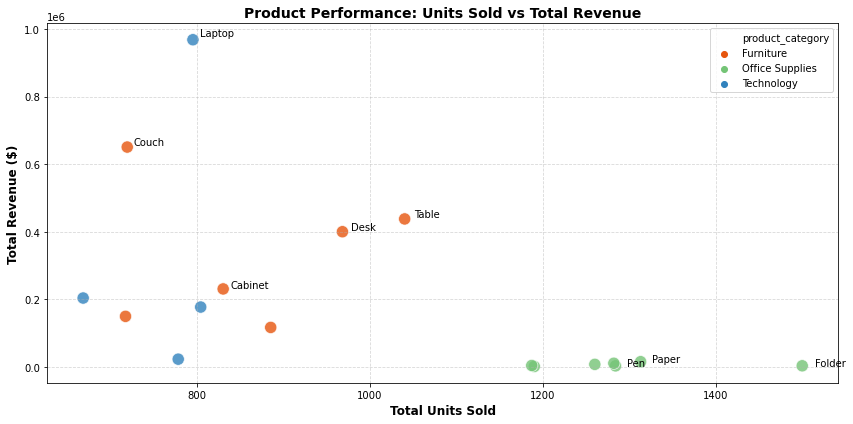

In [24]:
# Monthly aggregation
product_stats = pd.read_sql("""
SELECT
    product_category,
    product_name,
    unit_price,
    ROUND(SUM(revenue),2) AS total_revenue,
    SUM(quantity) AS total_units_sold
FROM sales_clean
GROUP BY product_category, product_name;
""", con)

# Define palette for 3 categories
palette = {
    'Technology': '#3182bd',   # blue
    'Furniture': '#e6550d',    # orange
    'Office Supplies': '#74c476'  # green
}

plt.figure(figsize=(12,6))
scatter = sns.scatterplot(
    data=product_stats,
    x='total_units_sold',
    y='total_revenue',
    hue='product_category',
    palette=palette,
    s=150,
    alpha=0.8
)

# Annotate top 5 by revenue
top5_revenue = product_stats.nlargest(5, 'total_revenue')
for i, row in top5_revenue.iterrows():
    plt.text(
        row['total_units_sold']*1.01,
        row['total_revenue']*1.01,
        row['product_name'],
        fontsize=10
    )

# Annotate top 5 by units sold
top5_units = product_stats.nlargest(3, 'total_units_sold')
for i, row in top5_units.iterrows():
    plt.text(
        row['total_units_sold']*1.01,
        row['total_revenue']*0.99,  # slightly below to avoid overlap
        row['product_name'],
        fontsize=10
    )

plt.title('Product Performance: Units Sold vs Total Revenue', fontsize=14, fontweight='bold')
plt.xlabel('Total Units Sold', fontsize=12, fontweight='bold')
plt.ylabel('Total Revenue ($)', fontsize=12, fontweight='bold')
plt.grid(linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Top Categories by Revenue & Profit


**Insights:**  
- Furniture leads with \\$1,984,746.65 revenue and \\$434,655.46 profit.  
- Technology follows with \\$1,371,402.92 revenue and \\$331,014.04 profit.  
- Office Supplies have significantly lower revenue (\\$42,483.92) and profit (\\$9,644.55), but dominate in units sold.

In [25]:
%%sql
-- Aggregate revenue and profit per product category (rounded)
SELECT
    RANK() OVER (ORDER BY SUM(revenue) DESC) AS revenue_rank,
    product_category,
    ROUND(SUM(revenue), 2) AS total_revenue,
    ROUND(SUM(profit), 2) AS total_profit
FROM sales_clean
GROUP BY product_category
ORDER BY total_revenue DESC;

 * sqlite:///SalesPerform.db
Done.


revenue_rank,product_category,total_revenue,total_profit
1,Furniture,1984746.65,434655.46
2,Technology,1371402.92,331014.04
3,Office Supplies,42483.92,9644.55


<a class="anchor" id="sec_6"></a>
***
## **<font color='#3182bd'>Regional & Customer Insights</font>**

Understanding how revenue and profit vary across regions and customer behaviors can help identify high-performing areas and opportunities to improve engagement or retention.

### Regional Performance

**Insights:**  
- **East** region is the highest-performing region with \\$964,002.92 revenue and \\$219,338.57 profit.  
- Other regions follow in rank: West, South, Central.  
- Regional comparisons can inform resource allocation, marketing focus, and sales strategy.

In [26]:
%%sql
-- Aggregate revenue and profit per region with ranking
SELECT
    region,
    ROUND(SUM(revenue), 2) AS total_revenue,
    ROUND(SUM(profit), 2) AS total_profit,
    RANK() OVER (ORDER BY SUM(profit) DESC) AS profit_rank,
    RANK() OVER (ORDER BY SUM(revenue) DESC) AS revenue_rank
FROM sales_clean
GROUP BY region
ORDER BY profit_rank;

 * sqlite:///SalesPerform.db
Done.


region,total_revenue,total_profit,profit_rank,revenue_rank
East,964002.92,219338.57,1,1
West,831694.44,198192.15,2,2
South,808741.17,181539.77,3,3
Central,794194.96,176243.56,4,4


### Customer Order Frequency

**Insights:**  
- Majority of customers (662) placed **1 order**, while a smaller subset placed multiple orders (up to 4 in this dataset).  
- This distribution highlights opportunities for customer retention strategies and repeat purchase incentives.

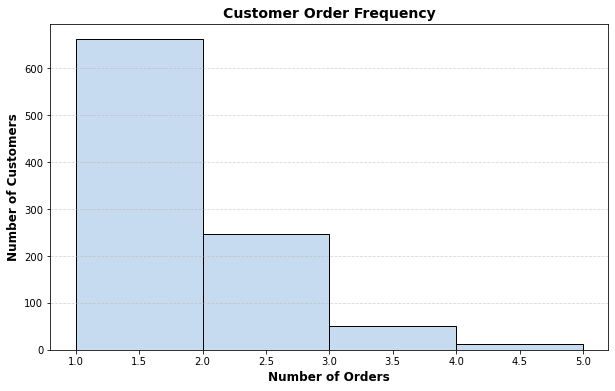

In [27]:
cust_orders = pd.read_sql("""
SELECT
    customer_id,
    COUNT(DISTINCT order_id) AS orders_count
FROM sales_clean
GROUP BY customer_id
""", con)

plt.figure(figsize=(10,6))
plt.hist(cust_orders['orders_count'], bins=range(1, cust_orders['orders_count'].max()+2), color='#C6DBEF', edgecolor='black')
plt.title('Customer Order Frequency', fontweight='bold', fontsize=14)
plt.xlabel('Number of Orders', fontweight='bold', fontsize=12)
plt.ylabel('Number of Customers', fontweight='bold', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

***
## **<font color='#3182bd'>Key Takeaways & Summary</font>**

- Sales are highly concentrated in **Technology** and **Furniture**, with a small number of high-revenue products dominating overall performance.  
- Office Supplies are high-volume but lower-revenue, suggesting they drive customer engagement rather than profit.  
- Revenue and profit trends reveal seasonal fluctuations, requiring careful monitoring of peak and low sales months.  
- The **East** region consistently outperforms others, providing a benchmark for regional strategies.  
- Customer order behavior shows that most customers are one-time buyers, indicating potential for retention and loyalty programs.  
***